## Logistic Regression Implementation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import make_classification

In [3]:
# create database
X,Y=make_classification(n_samples=1000,n_features=12,n_classes=2,random_state=42)

In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=42,test_size=0.3)

In [5]:
from sklearn.linear_model import LogisticRegression
logistic_regression=LogisticRegression()

In [6]:
logistic_regression.fit(x_train,y_train)
y_hat=logistic_regression.predict(x_test)

In [7]:
logistic_regression.predict_proba(x_test)[0:5]

array([[0.06275153, 0.93724847],
       [0.14553874, 0.85446126],
       [0.73831018, 0.26168982],
       [0.65903297, 0.34096703],
       [0.92707852, 0.07292148]])

In [8]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [9]:
score=accuracy_score(y_test,y_hat)
cm=confusion_matrix(y_test,y_hat)
report=classification_report(y_test,y_hat)

Accuracty :0.8733333333333333
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       157
           1       0.87      0.86      0.87       143

    accuracy                           0.87       300
   macro avg       0.87      0.87      0.87       300
weighted avg       0.87      0.87      0.87       300



<Axes: >

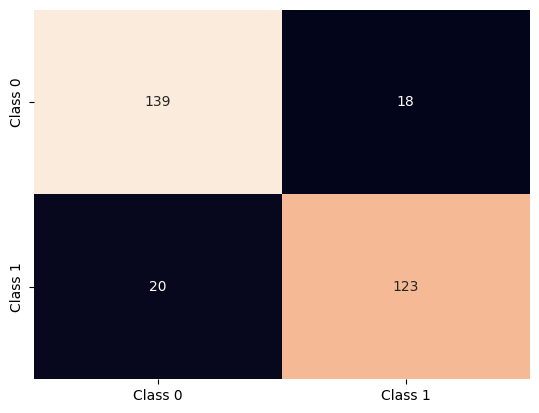

In [10]:
print(f"Accuracty :{score}\nClassification Report:\n{report}")
sns.heatmap(cm, annot=True, fmt='d',xticklabels=['Class 0', 'Class 1'],yticklabels=['Class 0', 'Class 1'],cbar=False)

### Hyperparamenter Tuninig and Cross Validation

In [11]:
model=LogisticRegression()
penalty=['l1','l2','elasticnet']
c_values=[100,10,1,0.1,0.01]
solver=['lbfgs','liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']

In [12]:
params=dict(penalty=penalty,C=c_values,solver=solver)

In [13]:
### Gridseach CV
from sklearn.model_selection import GridSearchCV
gridCV=GridSearchCV(estimator=model,param_grid=params,scoring='accuracy',cv=5,n_jobs=-1)

In [14]:
gridCV.fit(x_train,y_train)
y_hat=gridCV.predict(x_test)

In [15]:
print(gridCV.best_score_)

0.8685714285714287


In [16]:
gridCV.best_params_

{'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}

In [17]:
score=accuracy_score(y_test,y_hat)
cm=confusion_matrix(y_test,y_hat)
report=classification_report(y_test,y_hat)

Accuracty :0.8766666666666667
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.91      0.89       157
           1       0.90      0.84      0.87       143

    accuracy                           0.88       300
   macro avg       0.88      0.87      0.88       300
weighted avg       0.88      0.88      0.88       300



<Axes: >

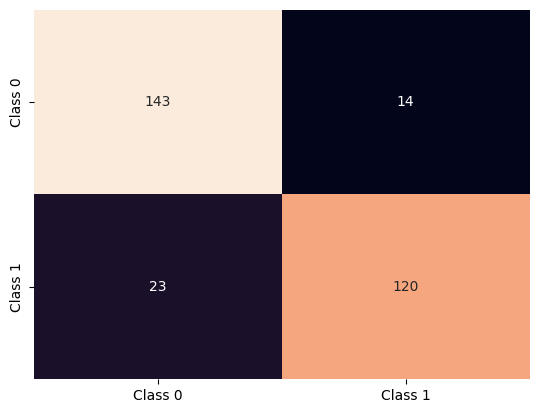

In [18]:
print(f"Accuracty :{score}\nClassification Report:\n{report}")
sns.heatmap(cm, annot=True, fmt='d',xticklabels=['Class 0', 'Class 1'],yticklabels=['Class 0', 'Class 1'],cbar=False)

### Randomised Search CV

In [19]:
from sklearn.model_selection import RandomizedSearchCV

In [20]:
model=LogisticRegression()
randomCV=RandomizedSearchCV(estimator=model,param_distributions=params,scoring='accuracy',cv=5,n_jobs=-1)

In [21]:
randomCV.fit(x_train,y_train)
y_hat=randomCV.predict(x_test)

In [22]:
print(randomCV.best_score_)

0.8614285714285714


In [23]:
randomCV.best_params_

{'solver': 'lbfgs', 'penalty': 'l2', 'C': 0.1}

In [24]:
score=accuracy_score(y_test,y_hat)
cm=confusion_matrix(y_test,y_hat)
report=classification_report(y_test,y_hat)

Accuracty :0.8766666666666667
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.90      0.88       157
           1       0.88      0.85      0.87       143

    accuracy                           0.88       300
   macro avg       0.88      0.88      0.88       300
weighted avg       0.88      0.88      0.88       300



<Axes: >

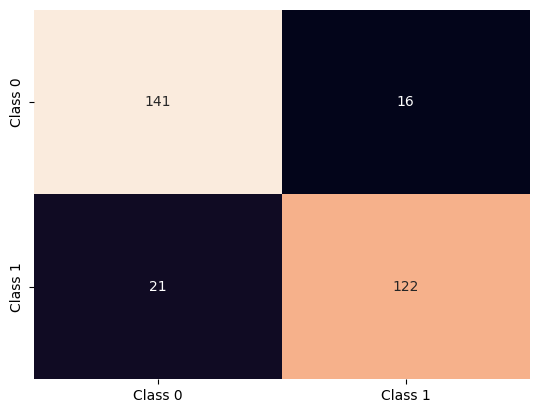

In [25]:
print(f"Accuracty :{score}\nClassification Report:\n{report}")
sns.heatmap(cm, annot=True, fmt='d',xticklabels=['Class 0', 'Class 1'],yticklabels=['Class 0', 'Class 1'],cbar=False)

### Logistic Regression for Multiclass Classification
#### One versus Rest

In [26]:
# create database
X,Y=make_classification(n_samples=1000,n_features=10,n_informative=8,n_classes=3,random_state=42)

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=42,test_size=0.3)

In [28]:
logistic_regression=LogisticRegression(multi_class='ovr')
logistic_regression.fit(x_train,y_train)
y_hat=logistic_regression.predict(x_test)

In [29]:
score=accuracy_score(y_test,y_hat)
cm=confusion_matrix(y_test,y_hat)
report=classification_report(y_test,y_hat)

Accuracty :0.7166666666666667
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.77      0.79        97
           1       0.69      0.69      0.69       101
           2       0.67      0.69      0.68       102

    accuracy                           0.72       300
   macro avg       0.72      0.72      0.72       300
weighted avg       0.72      0.72      0.72       300



<Axes: >

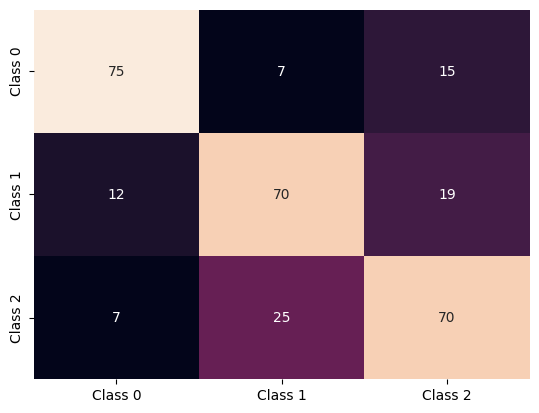

In [30]:
print(f"Accuracty :{score}\nClassification Report:\n{report}")
sns.heatmap(cm, annot=True, fmt='d',xticklabels=['Class 0', 'Class 1','Class 2'],yticklabels=['Class 0', 'Class 1','Class 2'],cbar=False)

### Hyper parameter Tuning using Randomised Search CV 
### for multiclass Logistic Regression

In [31]:
from sklearn.model_selection import RandomizedSearchCV

In [32]:
model=LogisticRegression(multi_class='ovr')
randomCV=RandomizedSearchCV(estimator=model,param_distributions=params,scoring='accuracy',cv=5,n_jobs=-1)

In [33]:
randomCV.fit(x_train,y_train)
y_hat=randomCV.predict(x_test)

In [34]:
print(randomCV.best_score_)

0.7128571428571429


In [35]:
randomCV.best_params_

{'solver': 'liblinear', 'penalty': 'l1', 'C': 10}

In [36]:
score=accuracy_score(y_test,y_hat)
cm=confusion_matrix(y_test,y_hat)
report=classification_report(y_test,y_hat)

Accuracty :0.7166666666666667
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.77      0.79        97
           1       0.69      0.69      0.69       101
           2       0.67      0.69      0.68       102

    accuracy                           0.72       300
   macro avg       0.72      0.72      0.72       300
weighted avg       0.72      0.72      0.72       300



<Axes: >

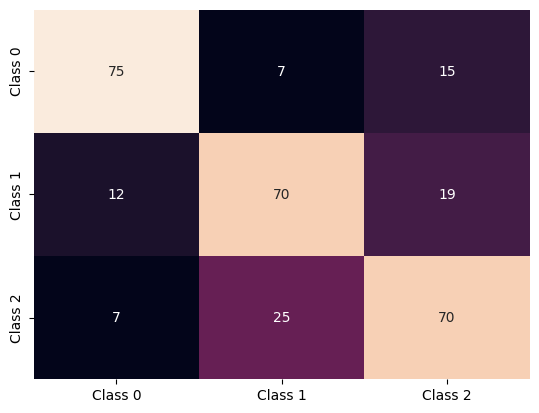

In [37]:
print(f"Accuracty :{score}\nClassification Report:\n{report}")
sns.heatmap(cm, annot=True, fmt='d',xticklabels=['Class 0', 'Class 1','Class 2'],yticklabels=['Class 0', 'Class 1','Class 2'],cbar=False)

### Logistic Regression for Imbalanced Dataset

In [38]:
#Generate and plt a synthetic imbalanced classification dataset
from collections import Counter
from sklearn.datasets import make_classification

In [39]:
# create database
X,Y=make_classification(n_samples=10000,n_features=2,n_clusters_per_class=1,
n_redundant=0,weights=[0.99],random_state=10)

In [40]:
X[0:5]

array([[ 1.87991016, -1.4850347 ],
       [ 0.37708311, -2.23858488],
       [ 1.35431163, -2.66463822],
       [-0.50984315, -1.50294963],
       [ 0.8635608 , -1.90636446]])

In [41]:
print(Counter(Y))

Counter({np.int64(0): 9846, np.int64(1): 154})


In [42]:
df=pd.DataFrame(X,columns=['feature_1','feature_2'])
df['class'] = Y

<Axes: xlabel='feature_1', ylabel='feature_2'>

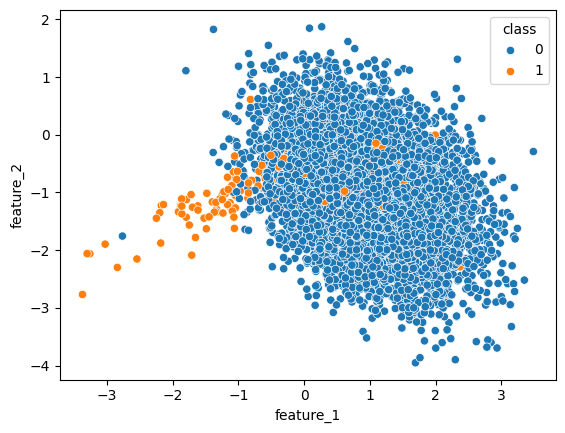

In [43]:
# Create the scatter plot
sns.scatterplot(
    data=df,
    x='feature_1',
    y='feature_2',
    hue='class'
)

In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=0,test_size=0.25)

In [45]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [46]:
penalty=['l1','l2','elasticnet']
c_values=[100,10,1,0.1,0.01]
solver=['newton-cg','lbfgs','liblinear','sag','saga']
class_weight=[{0:w,1:y} for w in [1,10,50,100] for y in [1,10,50,100]]

In [47]:
params=dict(penalty=penalty,C=c_values,solver=solver,class_weight=class_weight)
print(params)

{'penalty': ['l1', 'l2', 'elasticnet'], 'C': [100, 10, 1, 0.1, 0.01], 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10}, {0: 1, 1: 50}, {0: 1, 1: 100}, {0: 10, 1: 1}, {0: 10, 1: 10}, {0: 10, 1: 50}, {0: 10, 1: 100}, {0: 50, 1: 1}, {0: 50, 1: 10}, {0: 50, 1: 50}, {0: 50, 1: 100}, {0: 100, 1: 1}, {0: 100, 1: 10}, {0: 100, 1: 50}, {0: 100, 1: 100}]}


In [48]:
randomCV=RandomizedSearchCV(estimator=model,param_distributions=params,scoring='accuracy',cv=5,n_jobs=-1)

In [49]:
randomCV.fit(x_train,y_train)
y_hat=randomCV.predict(x_test)

In [50]:
print(randomCV.best_score_)

0.9870666666666666


In [51]:
randomCV.best_params_

{'solver': 'newton-cg',
 'penalty': 'l2',
 'class_weight': {0: 10, 1: 10},
 'C': 1}

In [52]:
score=accuracy_score(y_test,y_hat)
cm=confusion_matrix(y_test,y_hat)
report=classification_report(y_test,y_hat)

Accuracty :0.9888
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2470
           1       0.75      0.10      0.18        30

    accuracy                           0.99      2500
   macro avg       0.87      0.55      0.59      2500
weighted avg       0.99      0.99      0.98      2500



<Axes: >

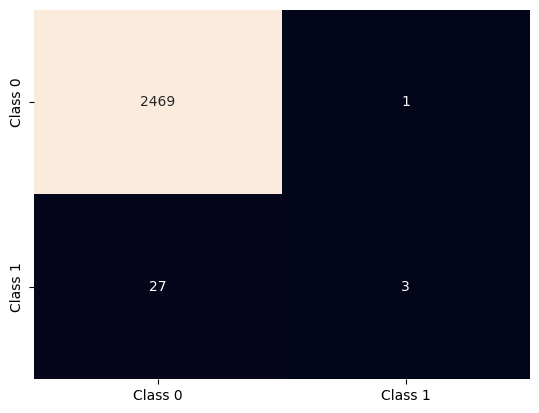

In [53]:
print(f"Accuracty :{score}\nClassification Report:\n{report}")
sns.heatmap(cm, annot=True, fmt='d',xticklabels=['Class 0', 'Class 1'],yticklabels=['Class 0', 'Class 1'],cbar=False)

### Logistic Regression With ROC curve And ROC AUC score 

In [54]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [55]:
# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)

In [56]:
## Split the dataset into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [57]:
# Created a dummy model with default 0 as output 
dummy_model_prob = [0 for _ in range(len(y_test))]
len(dummy_model_prob)

250

In [58]:
## Lets Create Basic Logistic Model
model=LogisticRegression()
model.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [59]:
## Prediction based on probability
model_prob=model.predict_proba(X_test)

In [60]:
model_prob[0:5]

array([[0.08172374, 0.91827626],
       [0.11334426, 0.88665574],
       [0.97683255, 0.02316745],
       [0.01810939, 0.98189061],
       [0.04546868, 0.95453132]])

In [61]:
## Lets focus on the positive outcome
model_prob=model_prob[:,1]

In [62]:
## Lets calulcate the scores
dummy_model_auc=roc_auc_score(y_test,dummy_model_prob)
model_auc=roc_auc_score(y_test,model_prob)
print(dummy_model_auc)
print(model_auc)

0.5
0.907648


In [63]:
## calculate ROC Curves
dummy_fpr, dummy_tpr, _ = roc_curve(y_test, dummy_model_prob)
model_fpr, model_tpr, thresholds = roc_curve(y_test, model_prob)

In [64]:
thresholds

array([           inf, 9.99408591e-01, 9.48789051e-01, 9.45875797e-01,
       9.35535228e-01, 9.34011458e-01, 9.28076959e-01, 9.26098222e-01,
       9.09462284e-01, 9.01743080e-01, 8.97971882e-01, 8.87913921e-01,
       8.55039135e-01, 8.50088338e-01, 8.45804170e-01, 8.32576905e-01,
       8.19647194e-01, 8.15943076e-01, 8.07941846e-01, 8.01595231e-01,
       7.72502908e-01, 7.72061776e-01, 7.18381195e-01, 7.16495666e-01,
       6.62185322e-01, 6.29275041e-01, 6.17835757e-01, 6.10039921e-01,
       5.96301960e-01, 5.88408407e-01, 5.69585444e-01, 5.42664587e-01,
       5.29164218e-01, 5.13611459e-01, 5.10245990e-01, 4.87974294e-01,
       4.84907445e-01, 4.56156711e-01, 4.47168571e-01, 4.26498394e-01,
       3.64869889e-01, 3.56886293e-01, 3.46033141e-01, 3.08051495e-01,
       3.01298121e-01, 2.85600699e-01, 2.85090339e-01, 2.18727039e-01,
       1.97022170e-01, 1.34038345e-01, 1.33315877e-01, 1.30519699e-01,
       1.27153287e-01, 1.04921781e-01, 1.04292580e-01, 7.04849255e-02,
      

In [65]:
model_fpr,model_tpr

(array([0.   , 0.   , 0.   , 0.008, 0.008, 0.016, 0.016, 0.024, 0.024,
        0.032, 0.032, 0.048, 0.048, 0.056, 0.056, 0.072, 0.072, 0.08 ,
        0.08 , 0.088, 0.088, 0.096, 0.096, 0.104, 0.104, 0.112, 0.112,
        0.128, 0.128, 0.136, 0.136, 0.144, 0.144, 0.16 , 0.16 , 0.184,
        0.184, 0.2  , 0.2  , 0.208, 0.208, 0.224, 0.224, 0.24 , 0.24 ,
        0.256, 0.256, 0.296, 0.296, 0.392, 0.392, 0.4  , 0.4  , 0.448,
        0.448, 0.528, 0.528, 0.56 , 0.56 , 0.624, 0.624, 0.952, 0.952,
        1.   ]),
 array([0.   , 0.008, 0.288, 0.288, 0.368, 0.368, 0.376, 0.376, 0.424,
        0.424, 0.44 , 0.44 , 0.528, 0.528, 0.552, 0.552, 0.608, 0.608,
        0.64 , 0.64 , 0.664, 0.664, 0.704, 0.704, 0.752, 0.752, 0.784,
        0.784, 0.792, 0.792, 0.808, 0.808, 0.824, 0.824, 0.832, 0.832,
        0.84 , 0.84 , 0.848, 0.848, 0.904, 0.904, 0.912, 0.912, 0.92 ,
        0.92 , 0.928, 0.928, 0.944, 0.944, 0.952, 0.952, 0.96 , 0.96 ,
        0.968, 0.968, 0.976, 0.976, 0.984, 0.984, 0.992, 0.9

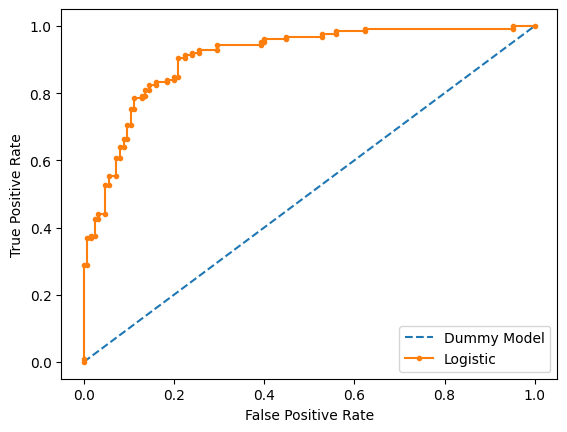

In [66]:
# plot the roc curve for the model
plt.plot(dummy_fpr, dummy_tpr, linestyle='--', label='Dummy Model')
plt.plot(model_fpr, model_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

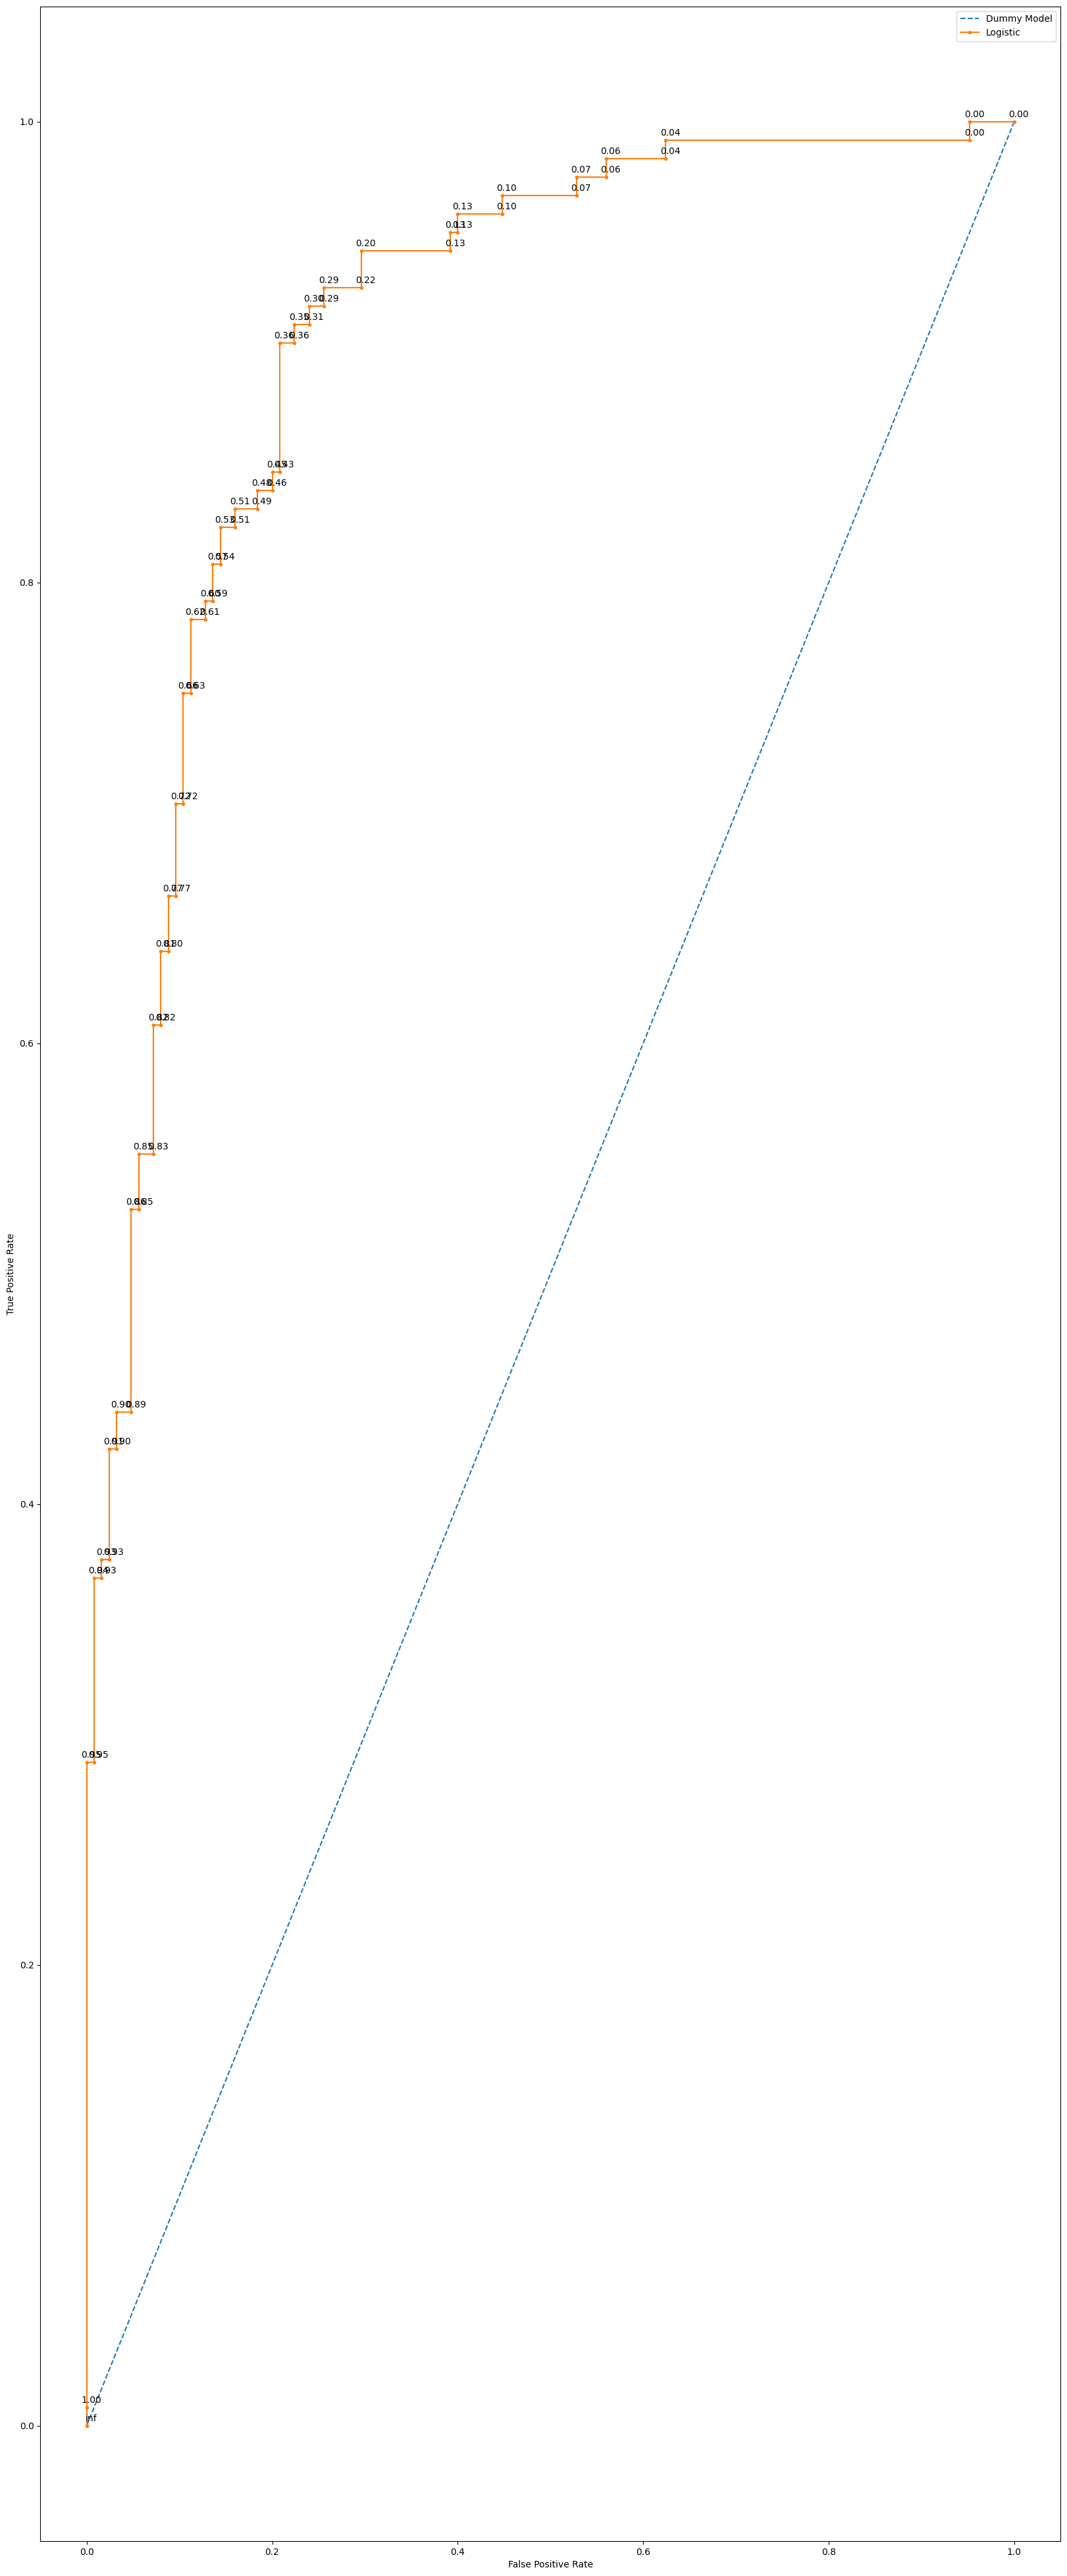

In [83]:
# plot the roc curve for the model
fig, ax = plt.subplots(figsize=(20, 50))
ax.plot(dummy_fpr, dummy_tpr, linestyle='--', label='Dummy Model')
ax.plot(model_fpr, model_tpr, marker='.', label='Logistic')
for fpr, tpr, threshold in zip(model_fpr, model_tpr, thresholds):
    ax.annotate(
        f'{threshold:.2f}',
        xy=(fpr, tpr),
        textcoords='offset points',
        xytext=(5, 5),
        ha='center'
    )
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.legend()
plt.show()